# Introduction to SEUIF97 Library

**Purpose:** Provide a high-speed shared library for developers to calculate the properties of water and steam  in extensive process simulations, such as Computational Fluid Dynamics (CFD), heat cycle calculations, simulations of non-stationary processes, and real-time process optimizations, where the direct IAPWS-IF97 implementation may be unsuitable because of their computing time consumption.
 
 Through the high-speed library, the results of the IAPWS-IF97  are accurately produced at above 3 times computational speed.
 
        Algorithm of the High-speed IAPWS-IF97 Library: 

        王培红,贾俊颖,程懋华. 水和水蒸汽热力性质IAPWS-IF97公式的通用计算模型[J]. 动力工程. 2001 21(6)：1564-1567(EI)
 
 This library is written in ANSI C for faster, smaller binaries and better compatibility for accessing the DLL/SO from different C++ compilers.
 
 For Windows and Linux users, convenient binary packages are provided.
 
         IF97 shared library: Windows(64):libseuif97.dll, Linux(64):libseuif97.so
 
 The package includes bindings for Python, Microsoft Excel. 
        
        Python API：seuif97.py
        
        Microsoft Excel Macro: DEMO_SEUIF97.xlsm,SEUIF97.xlam
 
**Author:** Cheng Maohua, Southeast University, Nanjing，China  (cmh@seu.edu.cn)

# Python 

* Python API: **seuif97.py** 

## Windows64 
  
1. copy **libseuif97.dll**  to a default path of Windows dll
      
        C:\Windows\system
   
2. copy **seuif97.py** to a default path of Python lib
    
        C:\Python35\Lib 
   
##  Linux64   
    
 1. copy **libseuif97.so**  to a default path of Linux shared lib
   
        $ sudo cp libseuif97.so /usr/lib/

 2. copy **seuif97.py** to a default path of Python lib
   
        $ sudo cp seuif97.py /usr/lib/python3.5/

## SEUIF97 share Library（API)

### Functions 

```c
   seupt( pressure,    temperature, propertyID)
   seuph( pressure,    enthalpy,    propertyID)
   seups( pressure,    entropy,     propertyID)
   seuhs( enthalpy,    entropy,     propertyID)
   seupx( pressure,    quality,     propertyID)
   seutx( temperature, quality,     propertyID)
```

   *  propertyID  - int，0-29,(see **Properties in libseuif97**)

### Function for process  
   
*  1 Isentropic Enthalpy Drop： ishd( pi,ti,pe)
    
        pi - double,inlet P; ti - double,inlet T

        pe - double,outlet P

* 2 Isentropic Efficiency： ief( pi,ti,pe,te)

         pi  -double，inlet P; ti  - double,inlet T

         pe  -double，outlet P; te  - double, outlet T

## Python 接口：

seuif97.py

In [ ]:
# -*- coding: utf-8 -*- 

from ctypes import c_int,c_double,WINFUNCTYPE,windll

prototype=WINFUNCTYPE(c_double,c_double,c_double,c_int)

fpt=prototype(("seupt",windll.libseuif97),)

fph=prototype(("seuph",windll.libseuif97),)
fps=prototype(("seups",windll.libseuif97),)
fhs=prototype(("seuhs",windll.libseuif97),)

def pt(p,t,oid): 
    result=fpt(p,t,oid)
    return result

def pt2h(p,t): 
    result=fpt(p,t,4)
    return result

def ph(p,h,oid): 
    result=fhs(h,s,oid)
    return result

def ps(p,s,oid): 
    result=fhs(p,s,oid)
    return result

def hs(h,s,oid): 
    result=fhs(h,s,oid)
    return result

## Example1 water or steam

In [3]:
from seuif97 import *
p=16.12
t=562.1

h=pt2h(p,t)
s=pt2s(p,t)
print('h:',h,'s: ',s)

t1=ph(p,h,1)
t2=ps(p,s,1)

print('t1: ',t1,' t2 ',t2)

p1=hs(h,s,0)
t3=hs(h,s,1)
print('p1: ',p1,' t3 ',t3)


h: 3471.7848838836876 s:  6.518652433515181


NameError: name 'ph' is not defined

## Example2: Thermodynamic Process  

In [2]:
from seuif97 import *
# HP of 300MW 

p1=16.1
t1=535.2
p2=3.56
t2=315.1

hdis=ishd(p1,t1,p2) # 等熵焓降
ef=ief(p1,t1,p2,t2) # 过程效率

print('等熵焓降 =',hdis)
print('过程效率 =',ef)

等熵焓降 = 426.2965108499634
过程效率 = 89.45513966623548


## T-s Diagram

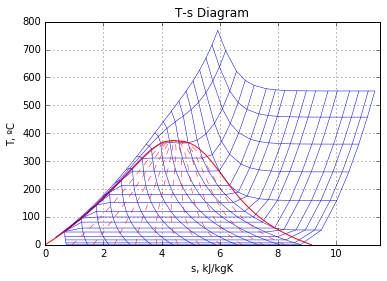

In [3]:
%matplotlib inline
"""
T-s Diagram

1 isoenthalpic lines isoh(200, 3600)kJ/kg
2 isobar lines isop(611.657e-6,100)MPa
3 saturation lines x=0,x=1
4 isoquality lines x(0.1,0.9)

"""
from seuif97 import pt2h, ph2t, ph2s, tx2s
import numpy as np
import matplotlib.pyplot as plt

Pt=611.657e-6
Tc=647.096

xAxis = "s"
yAxis = "T"
title = {"T": "T, ºC", "s": "s, kJ/kgK"}
plt.title("%s-%s Diagram" % (yAxis, xAxis))
plt.xlabel(title[xAxis])
plt.ylabel(title[yAxis])
plt.xlim(0, 11.5)
plt.ylim(0, 800)
plt.grid()

isoh = np.linspace(200, 3600, 18)
isop = np.array([Pt,0.001,0.002,0.004,0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.0,
                 2.0, 5.0, 10.0, 20.0, 50.0, 100.0])
for h in isoh:
    T = np.array([ph2t(p, h) for p in isop])
    S = np.array([ph2s(p, h) for p in isop])
    plt.plot(S, T, 'b', lw=0.5)

for p in isop:
    T = np.array([ph2t(p, h) for h in isoh])
    S = np.array([ph2s(p, h) for h in isoh])
    plt.plot(S, T, 'b', lw=0.5)

tc = Tc - 273.15
T = np.linspace(0.01, tc, 100)
for x in np.array([0, 1.0]):
    S = np.array([tx2s(t, x) for t in T])
    plt.plot(S, T, 'r', lw=1.0)

for x in np.linspace(0.1, 0.9, 11):
    S = np.array([tx2s(t, x) for t in T])
    plt.plot(S, T, 'r--', lw=0.5)

plt.show()

## H-S Diagram

In [ ]:
%matplotlib inline
"""
h-s Diagram

1 Calculating Isotherm lines isot(0.0,800)ºC
2 Calculating Isobar lines  isop(611.657e-6, 100)Mpa
3 Calculating saturation lines x=0,x=1
4 Calculating isoquality lines x(0.1,0.9)
"""
from  seuif97 import pt2h,pt2s,tx2s,tx2h
import numpy as np
import matplotlib.pyplot as plt

xAxis = "s"
yAxis = "h"
title = { "h": "h, kJ/kg", "s": "s, kJ/kgK"}

plt.title("%s-%s Diagram" % (yAxis, xAxis))
plt.xlabel(title[xAxis])
plt.ylabel(title[yAxis])
plt.xlim(0, 12.2)
plt.ylim(0, 4300)
plt.grid()

Pt=611.657e-6

isot = np.array([0, 50, 100, 200, 300, 400, 500, 600, 700, 800])
isop = np.array([Pt,0.001, 0.01, 0.1, 1, 10, 20, 50, 100])
# Isotherm lines in ºC
for t in isot:
    h = np.array([pt2h(p,t) for p in isop])
    s = np.array([pt2s(p,t) for p in isop])
    plt.plot(s,h,'g',lw=0.5)

# Isobar lines in Mpa
for p in isop:
     h = np.array([pt2h(p,t) for t in isot])
     s = np.array([pt2s(p,t) for t in isot])
     plt.plot(s,h,'b',lw=0.5)

tc=647.096-273.15
T = np.linspace(0.1,tc,100)  
# saturation lines
for x in np.array([0,1.0]):
    h = np.array([tx2h(t,x) for t in T])
    s = np.array([tx2s(t,x) for t in T])
    plt.plot(s,h,'r',lw=1.0)

# Isoquality lines
isox=np.linspace(0.1,0.9,11)
for x in isox:
    h = np.array([tx2h(t,x) for t in T])
    s = np.array([tx2s(t,x) for t in T])
    plt.plot(s,h,'r--',lw=0.5)

plt.show()